#Question 1
Starting with the given quadratic form:
\begin{align*}
 \propto \exp\left[-\frac{1}{2}\left(\sum_{i=1}^n \phi(x_i - \theta)^2 + \tau(\theta - \theta_0)^2\right)\right]
\end{align*}
Expanding the squares and combining terms:
\begin{align*} \propto \exp\left[-\frac{1}{2}\left(\sum_{i=1}^n \phi^2(x_i - \theta)^2 + 2\tau(\theta - \theta_0)\sum_{i=1}^n \phi(x_i - \theta) + \tau^2(\theta - \theta_0)^2\right)\right] \end{align*}

Completing the square in terms of \( \theta \):
\begin{align*} \propto \exp\left[-\frac{1}{2}\left(\sum_{i=1}^n \phi^2(x_i - \theta)^2 - 2\tau\theta(\theta_0 + \phi\sum_{i=1}^n x_i) + \tau^2\theta^2 + \tau^2(\theta_0 + \phi\sum_{i=1}^n x_i)^2 - \tau^2(\theta_0 + \phi\sum_{i=1}^n x_i)^2\right)\right] \end{align*}

Combining terms not involving \( \theta \):
\begin{align*} \propto \exp\left[-\frac{1}{2}\left(\sum_{i=1}^n \phi^2(x_i - \theta)^2 - 2\tau\theta(\theta_0 + \phi\sum_{i=1}^n x_i) + \tau^2\theta^2 + \tau^2(\theta_0 + \phi\sum_{i=1}^n x_i)^2\right) + \tau^2(\theta_0 + \phi\sum_{i=1}^n x_i)^2\right]\end{align*}

Recognizing the completed square:
\begin{align*} \propto \exp\left[-\frac{1}{2}(\theta - (\theta_0 + \phi\sum_{i=1}^n x_i)/(\tau + n\phi))^2(\tau + n\phi)\right] \end{align*}

Rewriting the expression with the desired factor:
\begin{align*} \propto \exp\left[-\frac{1}{2}(\tau + n\phi)(\theta - (\theta_0 + \phi\sum_{i=1}^n x_i)/(\tau + n\phi))^2\right] \end{align*}


#Question 2

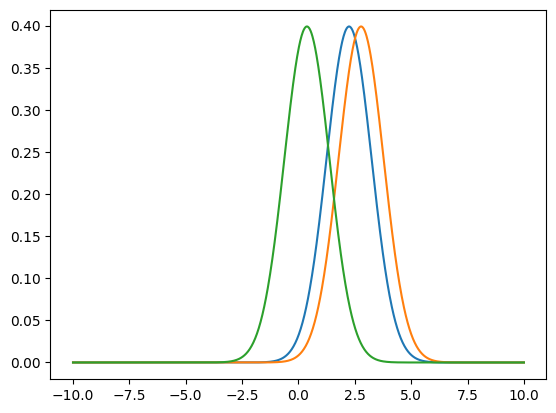

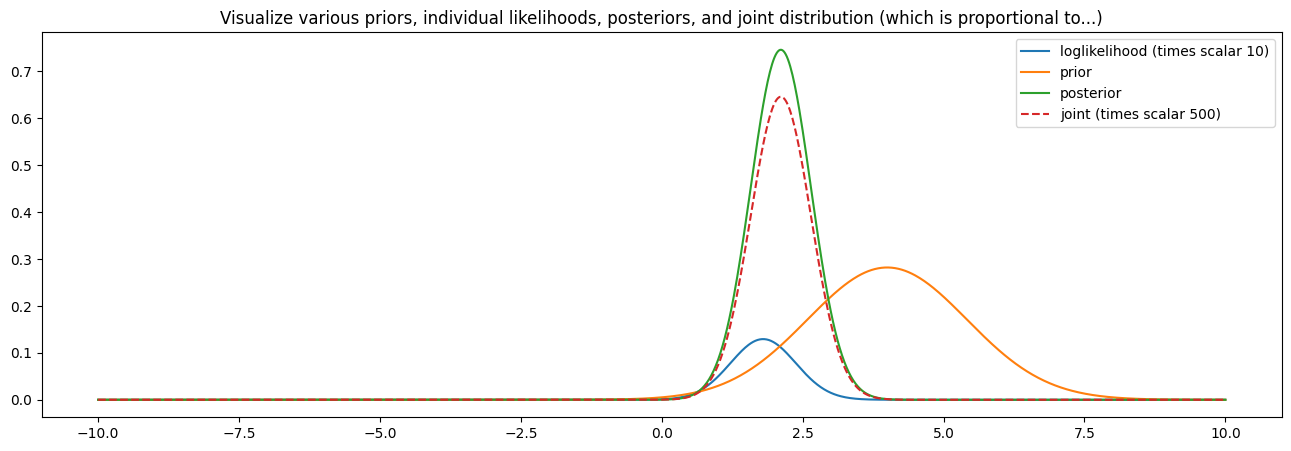

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

# Plot individual likelihoods for each observation
for xi in x:
    likelihood = stats.norm.pdf(xi, loc=parameter_domain, scale=1)
    plt.plot(parameter_domain, likelihood, label=f"Likelihood for x = {xi}")

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)

c, c2 = 500, 10

joint = c * np.prod(stats.norm.pdf(x[:, np.newaxis] * np.ones(parameter_domain.shape),
                                   loc=parameter_domain, scale=1), axis=0) * prior

posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)

plt.figure(figsize=(16, 5))
plt.plot(parameter_domain, c2 * np.prod(stats.norm.pdf(x[:, np.newaxis] * np.ones(parameter_domain.shape),
                                                     loc=parameter_domain, scale=1), axis=0),
         label="loglikelihood (times scalar "+str(c2)+")")
plt.plot(parameter_domain, prior, label="prior")
plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")")
plt.legend()
plt.title("Visualize various priors, individual likelihoods, posteriors, and joint distribution (which is proportional to...)")
plt.show()


#Question 3

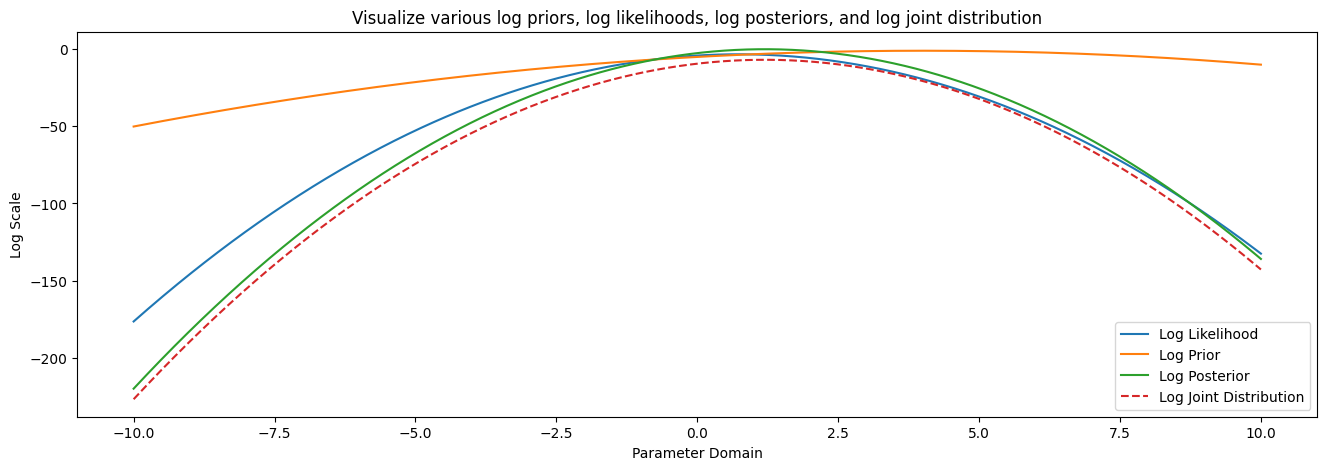

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Define the normal-normal model parameters
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

# Reshape parameter_domain to have the same shape as x for broadcasting
parameter_domain_reshaped = parameter_domain[:, np.newaxis]

# Calculate log likelihood for each observation
log_likelihoods = np.sum(stats.norm.logpdf(parameter_domain_reshaped, loc=x, scale=1), axis=1)

# Calculate log prior
log_prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)

# Calculate log joint distribution
log_joint = np.sum(stats.norm.logpdf(parameter_domain_reshaped, loc=x, scale=1), axis=1) + log_prior

# Calculate log posterior
log_posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)

plt.figure(figsize=(16, 5))
plt.plot(parameter_domain, log_likelihoods, label="Log Likelihood")
plt.plot(parameter_domain, log_prior, label="Log Prior")
plt.plot(parameter_domain, log_posterior, label="Log Posterior")
plt.plot(parameter_domain, log_joint, linestyle="--", label="Log Joint Distribution")
plt.legend()
plt.title("Visualize various log priors, log likelihoods, log posteriors, and log joint distribution")
plt.xlabel("Parameter Domain")
plt.ylabel("Log Scale")
plt.show()


#Question 4
### What is the posterior distribution of a normal likelihood with  p(θ)∝1 ?

In Bayesian statistics, the posterior distribution is given by Bayes' Theorem, which relates the likelihood, prior distribution, and marginal likelihood (also known as the evidence). For a normal likelihood with a flat (improper) prior \begin{align*} p(\theta) \propto 1 \end{align*}, the posterior distribution can be derived as follows:

Given:
- Likelihood: \begin{align*} p(x | \theta) \end{align*} (assumed to be normal in this case)
- Prior: \begin{align*} p(\theta) \propto 1 \end{align*} (flat/improper prior)

The posterior distribution is given by Bayes' Theorem:

\begin{align*} p(\theta | x) \propto p(x | \theta) \cdot p(\theta) \end{align*}

Since \begin{align*} p(\theta) \propto 1 \end{align*} is a constant, we can drop it from the proportional sign:

\begin{align*} p(\theta | x) \propto p(x | \theta) \end{align*}

Now, if the likelihood \begin{align*} p(x | \theta) \end{align*} is assumed to be a normal distribution with mean \begin{align*} \mu \end{align*} and variance \begin{align*} \sigma^2 \end{align*}, the posterior distribution will also be normal. The mean and variance of the posterior distribution can be calculated using the properties of the normal distribution.

If \begin{align*} p(x | \theta) \end{align*} is normally distributed with mean \begin{align*} \mu \end{align*} and variance \begin{align*} \sigma^2 \end{align*}, the posterior distribution will be normal with mean \begin{align*} \mu_{\text{post}} \end{align*} and variance \begin{align*} \sigma_{\text{post}}^2 \end{align*}, where:

\begin{align*} \mu_{\text{post}} = \frac{\sigma^2}{\sigma^2 + n} \bar{x} + \frac{n}{\sigma^2 + n} \mu \end{align*}

\begin{align*} \sigma_{\text{post}}^2 = \frac{\sigma^2}{\sigma^2 + n} \end{align*}

Here, \begin{align*} \bar{x} \end{align*} is the sample mean of the observed data, and \begin{align*} n \end{align*} is the sample size.





# Question 5

The log-likelihood and the posterior distribution differ in their interpretations and purposes, and their behavior is influenced by the choice of priors, including improper priors, and marginal likelihood constants.

Log-Likelihood:

Purpose: The log-likelihood measures how well the parameters of a model explain the observed data. It represents the probability of observing the given data under the assumed model.
Influence of Improper Priors: Improper priors do not contribute a proper prior probability distribution but can still be used in the likelihood function. Improper priors do not affect the likelihood directly but can impact the posterior.
Posterior Distribution:

Purpose: The posterior distribution represents the updated beliefs about the parameters after considering both the prior information and the observed data. It is calculated using Bayes' Theorem, combining the likelihood and the prior.
Influence of Improper Priors: Improper priors can lead to improper posteriors, where the posterior distribution may not integrate to 1. However, under certain conditions, the posterior can still be meaningful and interpretable. The posterior is proportional to the product of the likelihood and the prior, and the improper prior acts as a scaling constant.
Marginal Likelihood Constants:

Purpose: The marginal likelihood (also known as the evidence or normalization constant) ensures that the posterior distribution integrates to 1. It acts as a normalization factor to make the posterior a proper probability distribution.
Influence on Posterior: The marginal likelihood is the factor by which the prior needs to be scaled to ensure that the posterior integrates to 1. It is often calculated as the integral of the product of the likelihood and the prior over the entire parameter space.